# Task6: Predicting Real Estate House Prices

### Syed Hamza Ali
### Student Number: 101535231

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Read the csv data into a pandas dataframe and display the first 5 samples

In [2]:
url = 'Real estate.csv'
df = pd.read_csv(url)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [4]:
samples, columns = df.shape
print(f'The dataset has {samples} samples, and {columns} columns.')


The dataset has 414 samples, and 8 columns.


### What are the features available in the dataset?

In [5]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [6]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [7]:
df_cpy = df.copy()
df_X = df_cpy.drop('Y house price of unit area', axis=1)
df_X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [8]:
df_Y = df_cpy['Y house price of unit area']
df_Y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.3, random_state=15)

### Choose the model (Linear Regression)

In [32]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [33]:
model = LinearRegression()

### Train the model

In [34]:
model.fit(X_train,y_train)

LinearRegression()

### Apply the model

In [35]:
y_pred = model.predict(X_test)
y_pred

array([38.09783148, 50.13005247, 43.75197299, 46.77403153, 48.69211146,
       45.33958862, 30.80168123, 21.93237105, 51.60170199, 33.61645618,
       39.67422568, 44.47417604, 53.67967393, 39.09274907, 30.34945685,
       47.74485087, 44.85091654, 48.68208053, 46.18780021, 49.15105261,
       47.68383441, 46.90720725, 39.4433015 , 46.39417347, 34.94703611,
       25.2148834 , 32.1200745 , 44.8412581 , 27.93585716, 47.66203641,
       41.3579368 , 35.26691341, 30.10527082, 14.56608807, 42.00740368,
       32.74195053, 36.63174007, 29.77236567, 30.72650836, 36.38834842,
       15.22268408, 44.86142457, 48.92890279, 46.62500969, 29.57993269,
       46.50477146, 25.50563332, 35.3212871 , 37.2834467 , 45.03334593,
       36.89178257, 31.22094355, 46.40710382, 15.45151995, 35.41072745,
       47.13493797, 44.30675341, 36.69222153, 43.33269669, 35.87818821,
       32.02025747, 47.80363355, 47.32620281, 50.05420433, 51.84709361,
       36.0191614 , 47.51631404, 45.54229455, 40.11613583, 43.72

### Display the coefficients

In [36]:
model.coef_

array([-3.21197040e-03,  4.86760840e+00, -2.51497870e-01, -3.97639441e-03,
        1.42748674e+00,  2.32079385e+02, -5.97464455e+00])

### Find how well the trained model did with testing data

In [37]:
print('r2 Score : ', r2_score(y_test, y_pred))

r2 Score :  0.43582243225450146


In [39]:
# Testing with MSE and MAE
print('MSE : ', mean_squared_error(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))

MSE :  112.65818450566873
MAE :  6.633393606369928


### Plot House Age Vs Price
#### Hint: Use regplot in sns

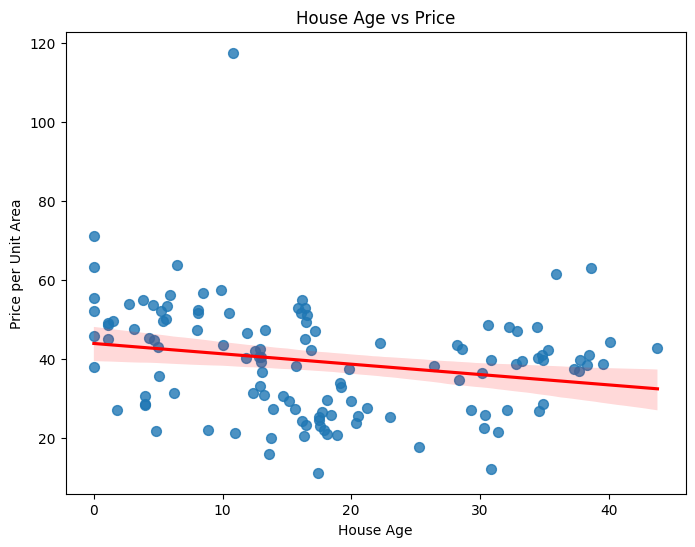

In [40]:
plt.figure(figsize=(8, 6))

X_age = X_test['X2 house age']

# Scatter plot with regression line
sns.regplot(x=X_age, y=y_test, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('House Age vs Price')
plt.xlabel('House Age')
plt.ylabel('Price per Unit Area')
plt.show()

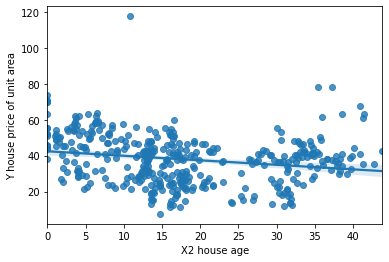

In [16]:
# Below is a sample plot provided by the Prof which can be used to compare results

### Plot Distance to MRT station Vs Price

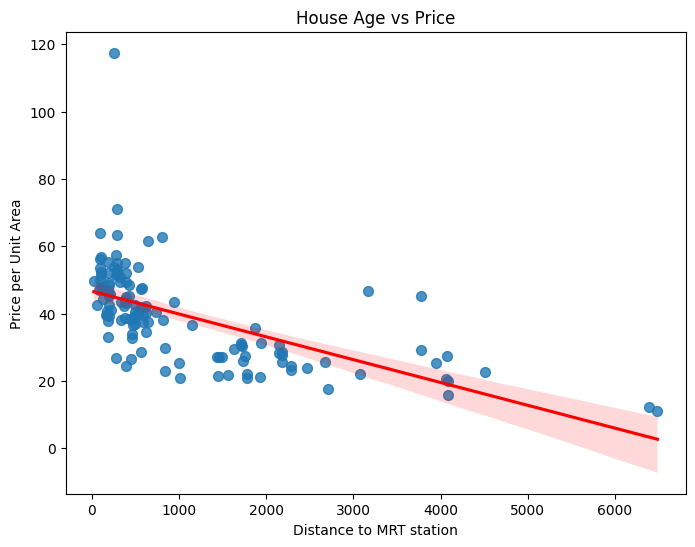

In [46]:
plt.figure(figsize=(8, 6))

X_MRT = X_test['X3 distance to the nearest MRT station']

# Scatter plot with regression line
sns.regplot(x=X_MRT, y=y_test, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('House Age vs Price')
plt.xlabel('Distance to MRT station')
plt.ylabel('Price per Unit Area')
plt.show()

### Plot Number of Convienience Stores Vs Price

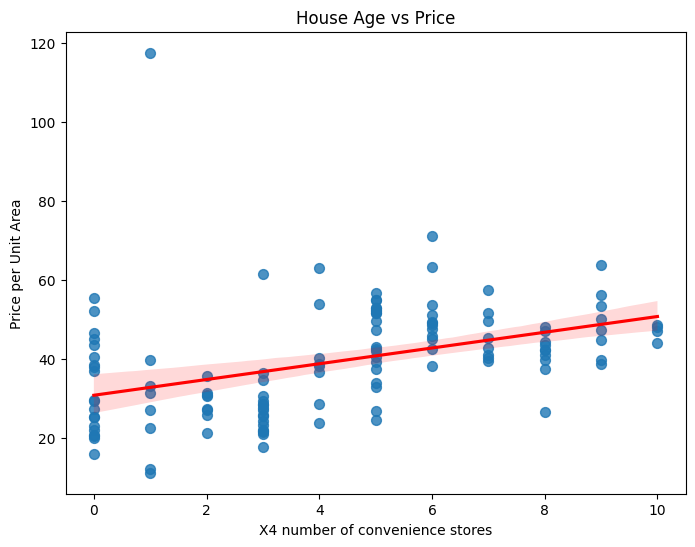

In [48]:
plt.figure(figsize=(8, 6))

X_Conv = X_test['X4 number of convenience stores']

# Scatter plot with regression line
sns.regplot(x=X_Conv, y=y_test, scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title('House Age vs Price')
plt.xlabel('X4 number of convenience stores')
plt.ylabel('Price per Unit Area')
plt.show()

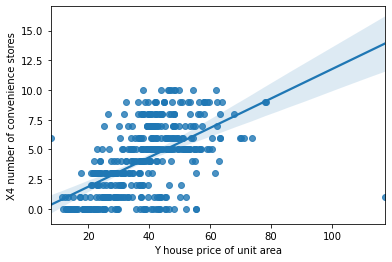

In [18]:
# Below is a sample plot provided by the Prof which can be used to compare results, I observed that the professors plot had the x and y values swapped